Notebook to explore dataset to see if we need to generate more samples with low ADC counts
1. Validation Set
2. Training Set
3. Testing Set
5. Full Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from os import listdir
from os.path import isfile, join

Looking at already processed data (val, train, test) first

In [2]:
wireplane = 'Z'
path = '../processed_data/'

In [3]:
def load_data(path, wireplane):
    x_train = np.load(path+'x_train_' + wireplane + '.npy')
    x_test = np.load(path+'x_test_' + wireplane + '.npy')
    y_train = np.load(path+'y_train_AE_' + wireplane + '.npy')
    y_test = np.load(path+'y_test_AE_' + wireplane + '.npy')
    
    #split train and valid sets (40k train 10k valid) 
    x_train, x_valid, y_train, y_valid = train_test_split(
        x_train, y_train, test_size=0.2, shuffle=False
    )
    
    mean = x_train.mean()
    std = x_train.std()

    x_train_scaled = (x_train-mean)/std
    x_test_scaled = (x_test-mean)/std
    x_valid_scaled = (x_valid-mean)/std
    
    y_train_scaled = (y_train-mean)/std
    y_test_scaled = (y_test-mean)/std
    y_valid_scaled = (y_valid-mean)/std

    return x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled, x_valid_scaled, y_valid_scaled, mean, std

In [4]:
# dataset_x -> noisy signal waveforms
# dataset_y -> clean signal waveforms
def adc_grouping(dataset_x, dataset_y):
    adc_3_5_x = []
    adc_3_5_y = []

    adc_5_10_x = []
    adc_5_10_y = []

    adc_10_15_x = []
    adc_10_15_y = []

    adc_15_20_x = []
    adc_15_20_y = []

    adc_gt_20_x = []
    adc_gt_20_y = []

    noise_x = []
    noise_y = []



    for i, wave in enumerate(dataset_y):
        if sum(abs(wave)) == 0:
            noise_x.append(dataset_x[i])
            noise_y.append(wave)
            continue
        max_adc = max(abs(wave))
        if max_adc > 3 and max_adc <= 5:
            adc_3_5_x.append(dataset_x[i])
            adc_3_5_y.append(wave)
        elif max_adc > 5 and max_adc <=10:
            adc_5_10_x.append(dataset_x[i])
            adc_5_10_y.append(wave)
        elif max_adc > 10 and max_adc <= 15:
            adc_10_15_x.append(dataset_x[i])
            adc_10_15_y.append(wave)
        elif max_adc > 15 and max_adc <= 20:
            adc_15_20_x.append(dataset_x[i])
            adc_15_20_y.append(wave)
        else:
            adc_gt_20_x.append(dataset_x[i])
            adc_gt_20_y.append(wave)

    grouped_waves = [
                    [adc_3_5_x, adc_3_5_y], 
                    [adc_5_10_x, adc_5_10_y], 
                    [adc_10_15_x, adc_10_15_y],
                    [adc_15_20_x, adc_15_20_y],
                    [adc_gt_20_x, adc_gt_20_y],
                    [noise_x, noise_y]
                    ]
    print(' 0: adc_3_5 \
            1: adc_5_10 \
            2: adc_10_15 \
            3: adc_15_20 \
            4: adc_gt_20 \
            5: noise')
    print()
    

    return grouped_waves

group_num_labels = {
                    0: 'adc_3_5',
                    1: 'adc_5_10',
                    2: 'adc_10_15',
                    3: 'adc_15_20',
                    4: 'adc_gt_20',
                    5: 'noise'
                    }

# prints summary
def print_counts(data_x, data_y):
    grouped = adc_grouping(data_x, data_y)
    sum_ = 0
    
    res = []
    for i in range(6):
        count = len(grouped[i][0])
        print(group_num_labels[i])
        print('{:<12}{}'.format('count', count))
        print()
        res.append(count)
        if i < 5:
            sum_ += count

    print('{:<15}{}'.format('     signal:', sum_))
    print('{:<15}{}'.format('     noise:', len(grouped[5][0])))
    print('{:<15}{}'.format('     TOTAL', sum_+len(grouped[5][0])))

    return res



In [5]:
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled, x_valid_scaled, y_valid_scaled, mean, std = load_data(path, wireplane)

x_train = x_train_scaled*std + mean
y_train = y_train_scaled*std + mean

x_valid = x_valid_scaled*std + mean
y_valid = y_valid_scaled*std + mean

x_test = x_test_scaled*std + mean
y_test = y_test_scaled*std + mean

### Validation Set

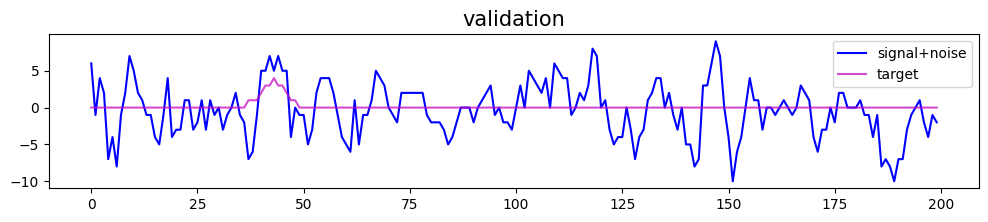

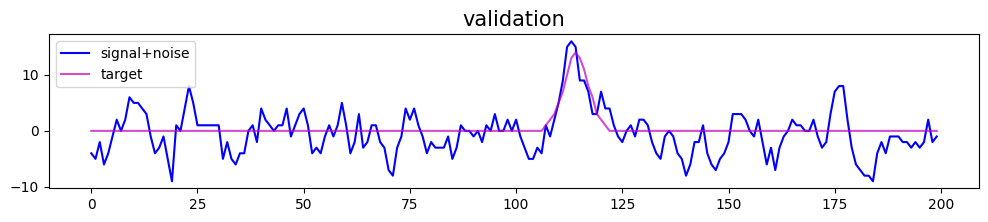

In [6]:
for idx in range(20,22):
    fig, (ax1) = plt.subplots(figsize=(12, 2), facecolor='white')
    ax1.plot(x_valid[idx],color='blue', label='signal+noise')
    ax1.plot(y_valid[idx],color='m',alpha=0.7, label='target')
    ax1.set_title("validation", fontsize=15)
    ax1.legend()

    plt.show()

In [7]:
val_set = print_counts(x_valid, y_valid)

 0: adc_3_5             1: adc_5_10             2: adc_10_15             3: adc_15_20             4: adc_gt_20             5: noise

adc_3_5
count       1311

adc_5_10
count       1814

adc_10_15
count       894

adc_15_20
count       509

adc_gt_20
count       5481

noise
count       9991

     signal:   10009
     noise:    9991
     TOTAL     20000


### Training Set

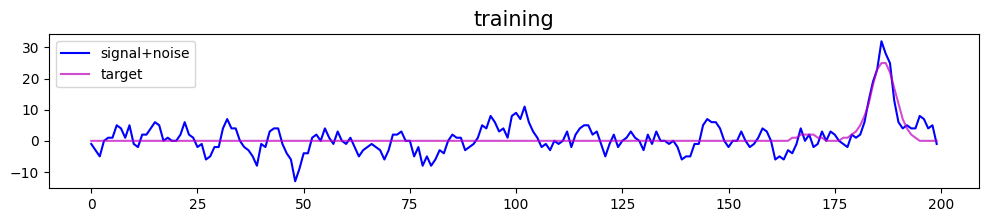

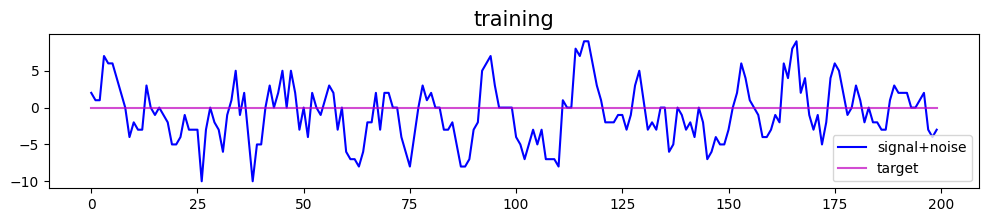

In [8]:
for idx in range(16,18):
    fig, (ax1) = plt.subplots(figsize=(12, 2), facecolor='white')
    ax1.plot(x_train[idx],color='blue', label='signal+noise')
    ax1.plot(y_train[idx],color='m',alpha=0.7, label='target')
    ax1.set_title("training", fontsize=15)
    ax1.legend()

    plt.show()

In [9]:
train_set = print_counts(x_train, y_train)

 0: adc_3_5             1: adc_5_10             2: adc_10_15             3: adc_15_20             4: adc_gt_20             5: noise

adc_3_5
count       5255

adc_5_10
count       7395

adc_10_15
count       3587

adc_15_20
count       2053

adc_gt_20
count       21701

noise
count       40009

     signal:   39991
     noise:    40009
     TOTAL     80000


### Testing Set

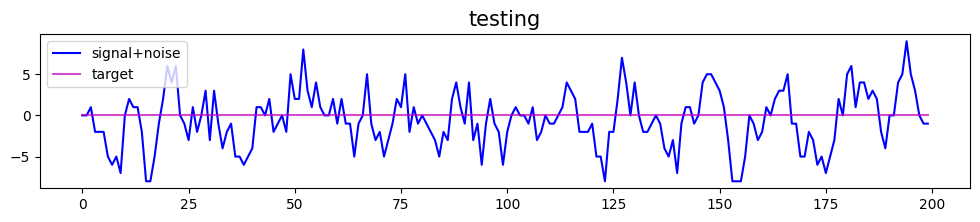

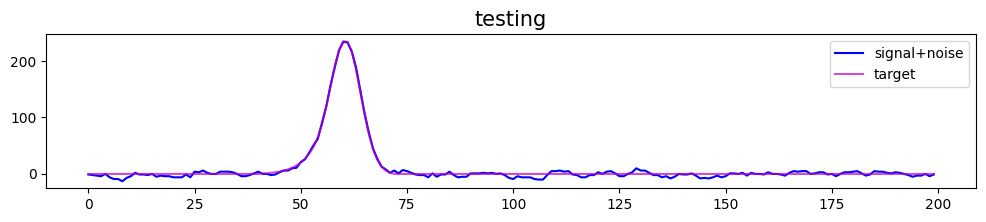

In [10]:
for idx in range(16,18):
    fig, (ax1) = plt.subplots(figsize=(12, 2), facecolor='white')
    ax1.plot(x_test[idx],color='blue', label='signal+noise')
    ax1.plot(y_test[idx],color='m',alpha=0.7, label='target')
    ax1.set_title("testing", fontsize=15)
    ax1.legend()

    plt.show()

In [11]:
test_set = print_counts(x_test, y_test)

 0: adc_3_5             1: adc_5_10             2: adc_10_15             3: adc_15_20             4: adc_gt_20             5: noise

adc_3_5
count       6582

adc_5_10
count       9149

adc_10_15
count       4266

adc_15_20
count       2644

adc_gt_20
count       27359

noise
count       50000

     signal:   50000
     noise:    50000
     TOTAL     100000


# Full Dataset
1. Actually ADC cut is applied. (Dataset with ADC > 3)

In [12]:
# takes full raw data and extracts waveform of length nticks 
def extract_wave(data, nticks):
    string = 'tck_'
    waveforms = []
    #Here I extract a column in each iteration and append to list
    for i in range(nticks):
        waveforms.append(data[string+str(i)].astype(np.int16))
    #convert to numpy ndarray
    waveforms = np.array(waveforms).astype(np.int16)
    #since raws and columns are inverted we need to transpose it
    return np.transpose(waveforms)

# takes full raw data and returns waveform of length nticks 
def get_std_waveforms(data, nticks):
    #Extract and scale waveform data (passthrough rn)
    raw_waveforms = extract_wave(data, nticks)
    #print(raw_waveforms) 
    #scaled_waveforms = waveform_scaler.fit_transform(raw_waveforms)
    return raw_waveforms

# imposes a min ADC value and filters waves
# takes wavefroms as input
def filter_signal_ADC_min(data, clean_data, adc_min):
    data_wf = []
    clean_wf = []
    for i in range(clean_data.shape[0]):
        if max(clean_data[i]) > adc_min:
            data_wf.append(data[i])
            clean_wf.append(clean_data[i])
    data_wf = np.array(data_wf)
    clean_wf = np.array(clean_wf)
    return data_wf, clean_wf

In [13]:
# data loader
def get_data(wireplane):

    path_cc = '../../../train_dune_lartpc_v2/nu_cc/'
    path_es = '../../../train_dune_lartpc_v2/nu_es/'
    noise_path = '../../../train_dune_lartpc_v2/noise/'
    print('nu_cc: ', path_cc)
    print('nu_es: ', path_es)
    print('noise: ', noise_path)
    print('')
    print('----------loading----------')
    sig_name = wireplane+"-signal"
    cln_name = wireplane+"-clnsig"
    
    filenames1 = sorted([path_cc+f for f in listdir(path_cc) if (isfile(join(path_cc, f)) and sig_name in f)])
    clean_filenames1 = sorted([path_cc+f for f in listdir(path_cc) if (isfile(join(path_cc, f)) and cln_name in f)])
    filenames2 = sorted([path_es+f for f in listdir(path_es) if (isfile(join(path_es, f)) and sig_name in f)])
    clean_filenames2 = sorted([path_es+f for f in listdir(path_es) if (isfile(join(path_es, f)) and cln_name in f)])
    filenames =  filenames1+filenames2
    clean_filenames = clean_filenames1+clean_filenames2
    noise_filenames = sorted([f for f in listdir(noise_path) if (isfile(join(noise_path, f)) and wireplane in f)])

    combined_data = np.concatenate([np.load(fname) for fname in filenames])
    combined_clean_data = np.concatenate([np.load(fname) for fname in clean_filenames])
    combined_noise = np.concatenate([np.load(noise_path+fname) for fname in noise_filenames])
    print('--------data loaded!-------')

    return combined_data, combined_clean_data, combined_noise

In [14]:
nticks = 200
ADC_MIN = 3

In [15]:
# load raw data
combined_data, combined_clean_data, combined_noise = get_data(wireplane)
print('---------------------------------')
print('     signal+noise: ', len(combined_data))
print('     clean signal: ', len(combined_clean_data))
print('     noise       : ', len(combined_noise))
print('---------------------------------')

# extract waveforms
signal_waveforms = get_std_waveforms(combined_data, nticks)
clean_signal_waveforms = get_std_waveforms(combined_clean_data, nticks)  # for autoencoder
print('')
print('filtering out small signals --> ADC >', ADC_MIN)
print('     noise+signal : ', signal_waveforms.shape)
print('     clean signal : ', clean_signal_waveforms.shape)
#Filter out tiny signals < ADC_MIN, but leave big signals to test on (incl > ADC_MAX)
signal_waveforms, clean_signal_waveforms = filter_signal_ADC_min(signal_waveforms,
                                            clean_signal_waveforms, ADC_MIN)
print('------------after filtering------------')
print('     noise+signal : ', signal_waveforms.shape)
print('     clean signal : ', clean_signal_waveforms.shape)

nu_cc:  ../../../train_dune_lartpc_v2/nu_cc/
nu_es:  ../../../train_dune_lartpc_v2/nu_es/
noise:  ../../../train_dune_lartpc_v2/noise/

----------loading----------
--------data loaded!-------
---------------------------------
     signal+noise:  224270
     clean signal:  224270
     noise       :  100000
---------------------------------

filtering out small signals --> ADC > 3
     noise+signal :  (224270, 200)
     clean signal :  (224270, 200)
------------after filtering------------
     noise+signal :  (175216, 200)
     clean signal :  (175216, 200)


In [16]:
full_set = print_counts(signal_waveforms, clean_signal_waveforms)

 0: adc_3_5             1: adc_5_10             2: adc_10_15             3: adc_15_20             4: adc_gt_20             5: noise

adc_3_5
count       23164

adc_5_10
count       32232

adc_10_15
count       15408

adc_15_20
count       8999

adc_gt_20
count       95413

noise
count       0

     signal:   175216
     noise:    0
     TOTAL     175216


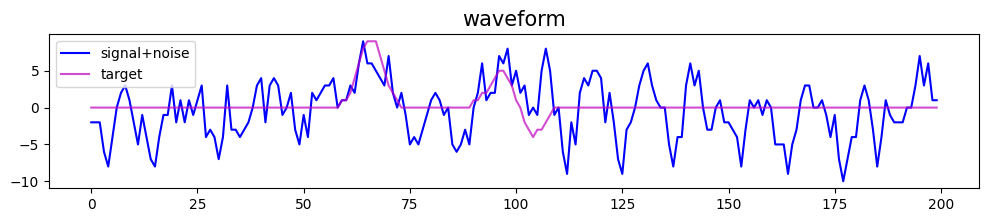

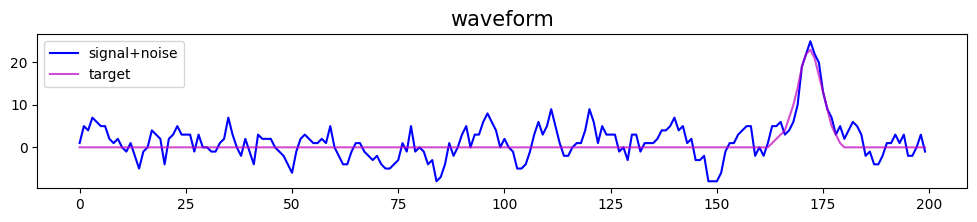

In [17]:
for idx in range(3,5):
    fig, (ax1) = plt.subplots(figsize=(12, 2), facecolor='white')
    ax1.plot(signal_waveforms[idx],color='blue', label='signal+noise')
    ax1.plot(clean_signal_waveforms[idx],color='m',alpha=0.7, label='target')
    ax1.set_title("waveform", fontsize=15)
    ax1.legend()

    plt.show()

In [18]:
%who

ADC_MIN	 adc_grouping	 ax1	 clean_signal_waveforms	 combined_clean_data	 combined_data	 combined_noise	 extract_wave	 fig	 
filter_signal_ADC_min	 full_set	 get_data	 get_std_waveforms	 group_num_labels	 idx	 isfile	 join	 listdir	 
load_data	 mean	 np	 nticks	 path	 plt	 print_counts	 signal_waveforms	 std	 
test_set	 train_set	 train_test_split	 val_set	 wireplane	 x_test	 x_test_scaled	 x_train	 x_train_scaled	 
x_valid	 x_valid_scaled	 y_test	 y_test_scaled	 y_train	 y_train_scaled	 y_valid	 y_valid_scaled	 


In [19]:
from tensorflow.keras.models import load_model

2023-05-09 03:24:41.145876: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-09 03:24:41.171387: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-09 03:24:41.279151: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-09 03:24:41.279836: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-09 03:24:41.919766: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [20]:
model = load_model('./models/model_AE_2048_no_pooling'+wireplane+'plane_nu.h5')

In [21]:
%%time
predictions = model.predict(x_test_scaled, batch_size=4096)
predictions = predictions.reshape(predictions.shape[0], predictions.shape[1])

25/25 [==============================] - 1s 49ms/step
CPU times: user 5.13 s, sys: 132 ms, total: 5.26 s
Wall time: 1.63 s


In [22]:
pred = predictions*std + mean

In [23]:
grouped_pred_waves = adc_grouping(pred, y_test)

 0: adc_3_5             1: adc_5_10             2: adc_10_15             3: adc_15_20             4: adc_gt_20             5: noise



In [24]:
def get_num_TP(group_num):
    if group_num > 4:
        print('arg should be less than 6')
        return -1
    y = grouped_pred_waves[group_num][1]
    infer = grouped_pred_waves[group_num][0]

    positive_y = []
    positive_p = []

    negative_y = []
    negative_p = []

    for i, wave in enumerate(infer):
        if max(abs(wave)) > 3:
            positive_y.append(y[i])
            positive_p.append(wave)
        else:
            negative_y.append(y[i])
            negative_p.append(wave)
    print(group_num_labels[group_num])
    print('{:<12}{}'.format('Total:', len(y)))
    print('{:<12}{}'.format('True Pos: ', len(positive_y)))
    print('{:<12}{}'.format('False Pos: ', len(negative_y)))
    print()

    return len(positive_y)

In [25]:
test_set_TP = []
for i in range(5):
    test_set_TP.append(get_num_TP(i))
    

adc_3_5
Total:      6582
True Pos:   868
False Pos:  5714

adc_5_10
Total:      9149
True Pos:   3832
False Pos:  5317

adc_10_15
Total:      4266
True Pos:   3780
False Pos:  486

adc_15_20
Total:      2644
True Pos:   2631
False Pos:  13

adc_gt_20
Total:      27359
True Pos:   27359
False Pos:  0



In [26]:
full_set[5]

0

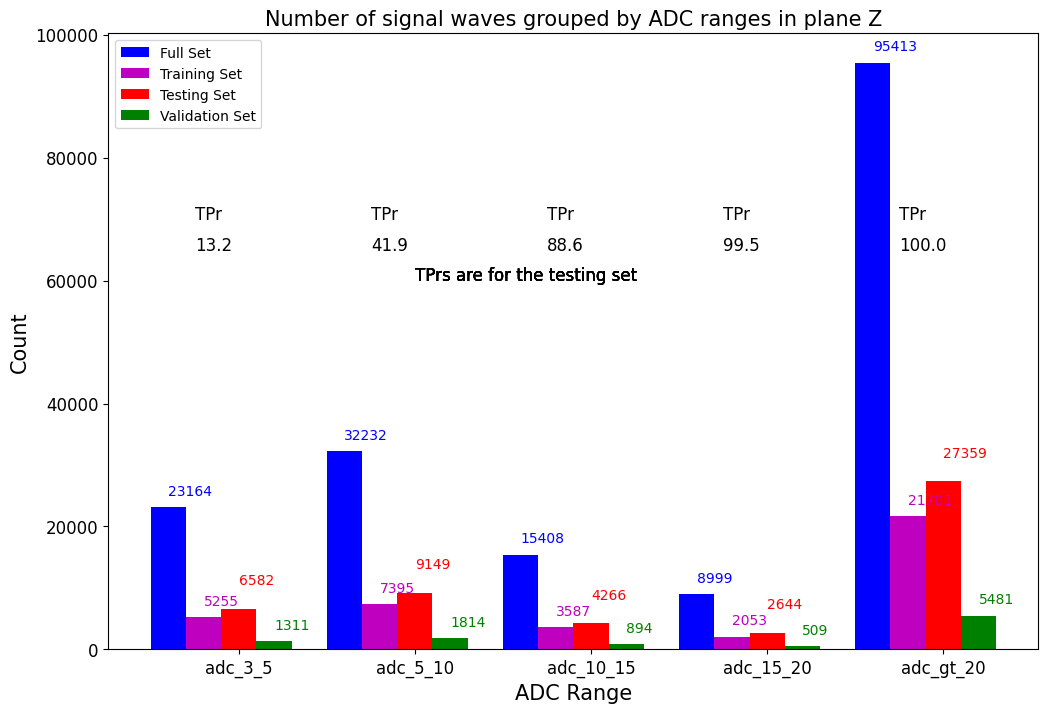

In [28]:
fig = plt.figure(figsize=(12,8))
plt.title('Number of signal waves grouped by ADC ranges in plane ' + wireplane, size=15)

x_labels = [group_num_labels[i] for i in range(5)]
bar_width = 0.2

plt.bar([i - 2*bar_width for i in range(5)], full_set[0:5], width=bar_width, color='blue', label='Full Set')
plt.bar([i - bar_width for i in range(5)], train_set[0:5], width=bar_width, color='m', label='Training Set')
plt.bar([i for i in range(5)], test_set[0:5], width=bar_width, color='r', label='Testing Set')
plt.bar([i + bar_width for i in range(5)], val_set[0:5], width=bar_width, color='green', label='Validation Set')

for i in range(5):
    dist = 2000
    plt.text(i - 2*bar_width, full_set[i] + dist, full_set[i], color='blue')
    plt.text(i - bar_width, train_set[i] + dist, train_set[i], color='m')
    plt.text(i, test_set[i] + 2*dist, test_set[i], color='r')
    plt.text(i + bar_width, val_set[i] + dist, val_set[i], color='g')

    plt.text(i-0.25, 70000, 'TPr', size=12)
    plt.text(i-0.25, 65000, round((test_set_TP[i]/test_set[i])*100, 1), size=12)

    plt.text(1, 60000, 'TPrs are for the testing set', size=12)

plt.xticks([i for i in range(5)], x_labels, size=12)
plt.yticks(size=12)
plt.legend()
plt.xlabel('ADC Range', size=15)
plt.ylabel('Count', size=15)
plt.show()